In [1]:
import torchvision

/Users/jinseokmoon/miniforge3/envs/trash/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchsummary import summary

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [86]:
_data = trash_dataset[0]

In [10]:
summary(model, (3,1600,1200))

AttributeError: 'ImageList' object has no attribute 'size'

In [90]:
tf_toTensor = ToTensor() 

NameError: name 'ToTensor' is not defined

In [91]:
_tens = torchvision.transforms.ToTensor()

In [94]:
_img = _tens(_data[0])

In [106]:
torch.unsqueeze(_img,0).shape

torch.Size([1, 3, 3456, 4608])

In [67]:
summary(model, (3, input_shape[0], input_shape[1]))

AssertionError: targets should not be none when in training mode

In [52]:
num_classes = 10 # 1 class (person) + background

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

model=model.to(device)

/Users/jinseokmoon/miniforge3/envs/trash/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jinseokmoon/miniforge3/envs/trash/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [54]:
summary(model, trash_dataset[0])

AssertionError: targets should not be none when in training mode

In [48]:
jsmodel = JSNet()
summary(, trash_dataset[0])

AssertionError: targets should not be none when in training mode

In [15]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

In [22]:
root = './../data/train/'

In [38]:
import sys
sys.path.append("./../")

In [40]:
from data_loader.dataset import TrashDataSet
from torch.utils.data import DataLoader

train_path = "./../data/train/"

trash_dataset = TrashDataSet(train_path)

myLoader = DataLoader(trash_dataset)

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!
loading annotations into memory...
Done (t=1.12s)
creating index...
index created!
loading annotations into memory...
Done (t=1.26s)
creating index...
index created!
loading annotations into memory...
Done (t=1.17s)
creating index...
index created!
loading annotations into memory...
Done (t=1.16s)
creating index...
index created!
loading annotations into memory...
Done (t=1.27s)
creating index...
index created!
loading annotations into memory...
Done (t=1.21s)
creating index...
index created!


In [16]:
_data = trash_dataset[0]
plt.imshow(_data)

NameError: name 'trash_dataset' is not defined

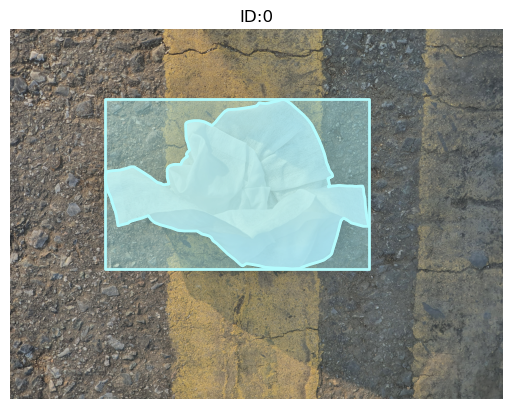

In [47]:
# load and display instance annotations
fig, ax = plt.subplots(1,1)
ax.axis("off")
ax.imshow(I);
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=True)

ax.set_title(f'ID: {img["id"]}')
plt.show()